In [38]:
# Importation des bibliothèques
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import warnings
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings('ignore')

In [2]:
# Extraction du jeu de données
df1 = pd.read_csv("athlete_events.csv")
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
# Afficher les informations liées au Dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
# Analyse descriptive univariée

df1.describe(include = "all")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
# Lister les variables qualitatives et quantitatives
qualitatives = [i for i in df1.columns  if df1.dtypes[i] == "object"]
quantitatives = [i for i in df1.columns  if df1.dtypes[i] != "object"]


In [6]:
qualitatives

['Name',
 'Sex',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [7]:
quantitatives

['ID', 'Age', 'Height', 'Weight', 'Year']

In [8]:
# Enumérer les différentes modalités de la variable "Medal"(nombre du type de médailles obtenues depuis 1896)
df1.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [9]:
# athlètes français avec le plus de médailles(Top 5)
french_team = df1.query('NOC == "FRA"')
french_team[(french_team.Medal == "Gold") |
            (french_team.Medal == "Silver")|
            (french_team.Medal == "Bronze")].Name.value_counts().head(5)

Roger Franois Ducret            8
Philippe Louis Eugne Cattiau    8
Lon Ernest Moreaux              7
Philippe Claude Riboud          6
Maurice Marie Lecoq             6
Name: Name, dtype: int64

In [10]:
# Athlètes féminines avec le plus de médailles olympiques(Top 5)

french_team[(french_team.Sex == "F") & ((french_team.Medal == "Gold") |
            (french_team.Medal == "Silver")|
            (french_team.Medal == "Bronze"))].Name.value_counts().head(5)

Laura lodie Flessel-Colovic                      5
Jeannie Longo-Ciprelli                           4
Brigitte Latrille-Gaudin                         3
Pascale Marie Odette Marcelle Trinquet-Hachin    3
Marie-Jos Juliana Prec (Hontas-)                 3
Name: Name, dtype: int64

In [11]:
#Athlètes françaises avec le plus de médailles olympiques

df1[((df1.Medal == "Gold") | (df1.Medal == "Silver") |(df1.Medal == "Bronze"))& (df1.Sex == "F")].Name.value_counts()

Larysa Semenivna Latynina (Diriy-)                 18
Natalie Anne Coughlin (-Hall)                      12
Dara Grace Torres (-Hoffman, -Minas)               12
Birgit Fischer-Schmidt                             12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
                                                   ..
Maude Astrid Karln                                  1
Ayumi Karino                                        1
Karin Rodrigues                                     1
Elvina Khaydaryanovna Karimova                      1
Liu Yaju                                            1
Name: Name, Length: 7438, dtype: int64

In [12]:
french_team.groupby(["Name", "Year"])["Name"].value_counts()


Name                     Year  Name                   
A. Albert                1900  A. Albert                  1
A. Brun                  1900  A. Brun                    1
A. Charles Six           1928  A. Charles Six             1
A. Christory             1924  A. Christory               1
A. Darnis                1900  A. Darnis                  1
                                                         ..
velyne Cloupet           1928  velyne Cloupet             1
velyne Imbert            1984  velyne Imbert              1
velyne Lebret (-Renard)  1964  velyne Lebret (-Renard)    1
velyne lien              1988  velyne lien                2
                         1996  velyne lien                1
Name: Name, Length: 8276, dtype: int64

# **Test de Pearson**

Ce test permet de trouver le coefficient de corrélation existant entre deux variables de type quantitatifs.
A savoir si le coefficient est proche de 1 on parle de forte corrélation positive et si par contre il est proche de -1 on parle de forte corrélation négative.

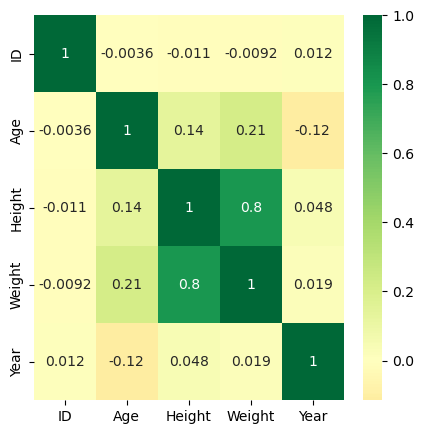

In [13]:
# Tracé de la matrice de corrélation
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)
plt.show()

A titre d'exemple nous pouvons dire que le coefficient de corrélation entre la taille et le poids des athlètes est de 0.79

# **Test D'anova**

Encore appelé **Test d'analyse de la variance** est ce qu'on appele un **test d'hypothèse** qui est réalisé pour permettre de savoir si **deux variables( qualitative et quantitative) sont indépendantes( Hypothèse H0) ou dépendantes(Hypothèse H1).**

In [14]:

model = ols('Age ~ Sex', data = df1).fit()

anova_result = sm.stats.anova_lm(model, typ=1)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
Sex,1.0,3.439290e+05,343929.010446,8693.140403,0.0
Residual,261640.0,1.035133e+07,39.563264,NaN,NaN


* Si PR(>F) < 0.05 , nous pouvons dire que les 2
variables sont correlées ( Hypothèse H1)

* Si PR(>F) > 0.05 , nous pouvons dire quil n'existe pas de corrélation entre les deux variables.

# **Test de Khi 2**

C'est un test d'hypothèse qui permet de déterminer si 2 variables qualitatives sont indépendantes ou pas.

In [15]:

# Matrice de contingence entre la variable Sex et Medal
contigency= pd.crosstab(df1['Sex'], df1['Medal'])
contigency



Medal,Bronze,Gold,Silver
Sex,,,
F,3771,3747,3735
M,9524,9625,9381


In [16]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p

0.691742207283466

Pour le **test de khi 2** , nous imposons un seuil, en général il est de 95%(0.95) si la p-value(p) obtenue est inférieur à 0.95 on dit alors que les variables sont indépendantes(Hypothèse H0) sinon on dira qu'elles sont dépendantes donc correlées.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [18]:
# Fichier comprenant les 10 pays ayant le plus de participation
top10_countries = df1.Team.value_counts().sort_values(ascending=False).head(10)
top10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


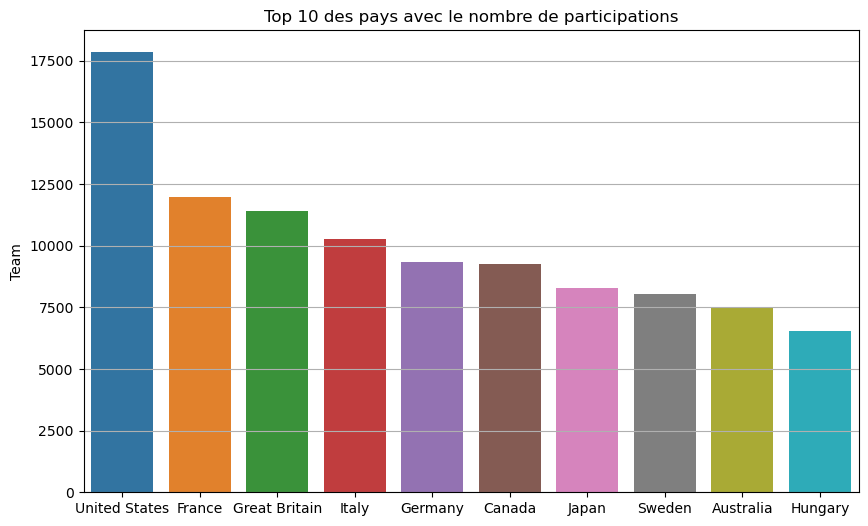

In [19]:
%pylab inline

plt.figure(figsize=(10,6))

plt.title('Top 10 des pays avec le nombre de participations')
plt.grid()
sns.barplot(x=top10_countries.index, y=top10_countries)
plt.show()

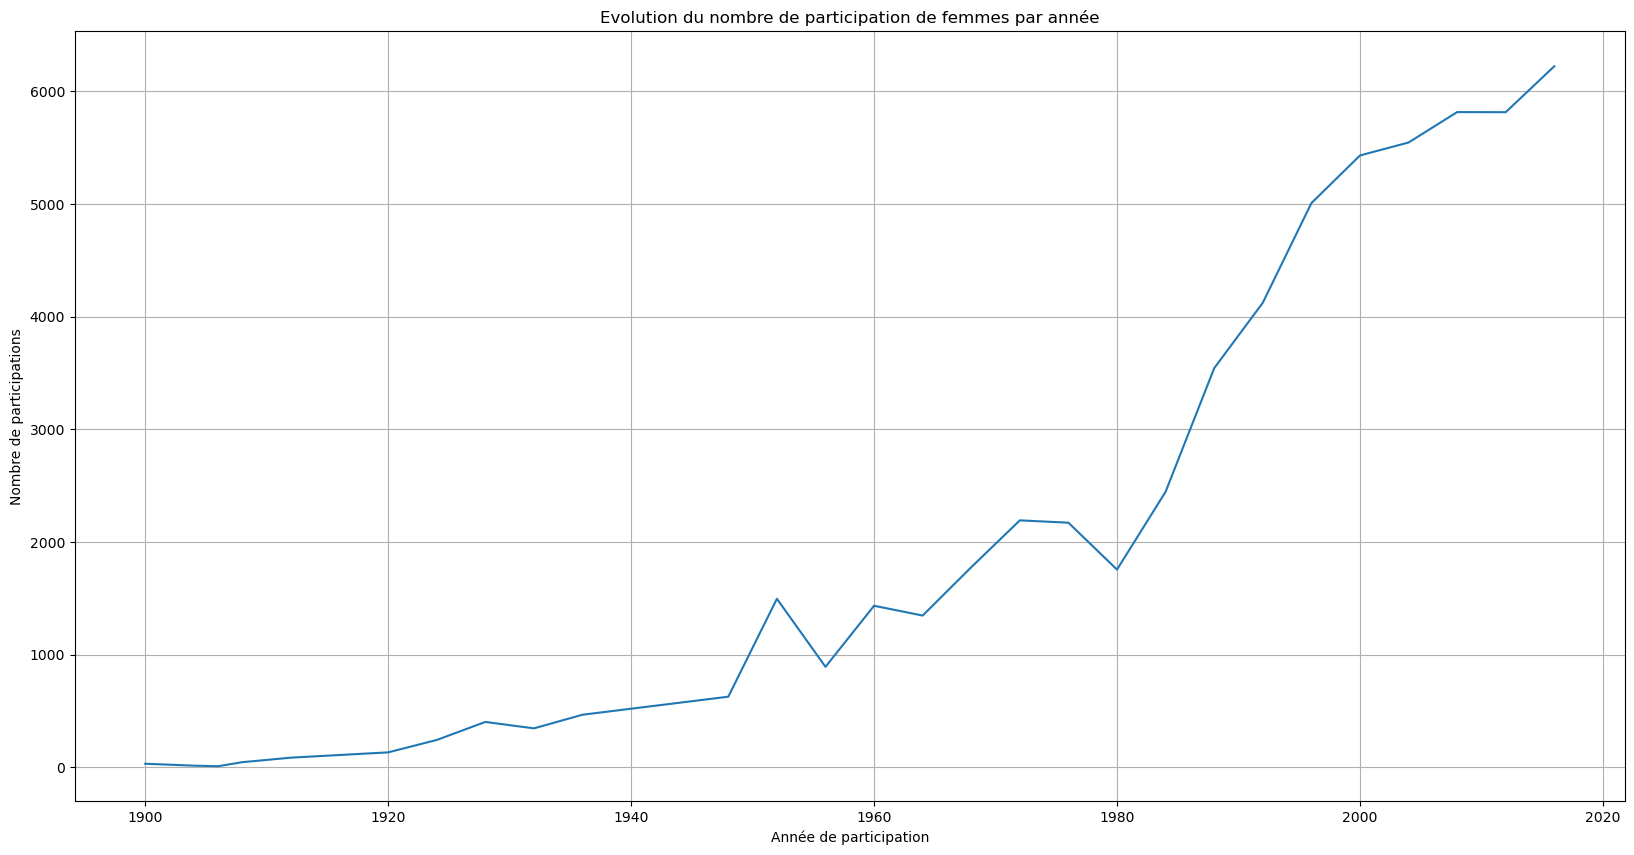

In [20]:
women = df1[(df1.Sex == "F") & (df1.Season == "Summer") ]
womenYear = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
womenYear.loc[:,'F'].plot()
plt.grid()
plt.ylabel("Nombre de participations")
plt.xlabel("Année de participation")
plt.title('Evolution du nombre de participation de femmes par année')
plt.show()

**Nettoyage du jeu de données**

In [21]:
df1.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [22]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [23]:
# Suppression variables inutiles

df4 = df1.drop(columns = ['ID', 'Name', 'Team', 'Games',
       'Year', 'Season', 'City', 'Event'])
df4

,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,CHN,Basketball,NaN
1,M,23.0,170.0,60.0,CHN,Judo,NaN
2,M,24.0,NaN,NaN,DEN,Football,NaN
3,M,34.0,NaN,NaN,DEN,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,Luge,NaN
271112,M,27.0,176.0,59.0,POL,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,POL,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,POL,Bobsleigh,NaN


In [24]:
# Remplacement des valeurs manquantes
df4["Medal"].fillna("Chocolate", inplace = True)

In [25]:
# Supression du reste des valeurs manquantes
df5 = df4.dropna()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  object 
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   NOC     206165 non-null  object 
 5   Sport   206165 non-null  object 
 6   Medal   206165 non-null  object 
dtypes: float64(3), object(4)
memory usage: 12.6+ MB


**Création de la variable IMC**

In [26]:
df5["IMC"] = df5["Height"]/(df5["Weight"]**2)

In [27]:
# supression des variables : "Height" et "Weight"
df5 = df5.drop(columns = ["Height", "Weight"])

## Séparation du jeu de données(Variable cible et variables prédictives)

In [28]:
# Separation variables cibles et predictives
df6 = df5.copy()
Y = df6['Medal']
Y = Y.map({'Chocolate':0, 'Bronze':1, 'Silver':2, 'Gold':3}).astype(int)

X = df6.drop(columns = ['Medal'])

## Transformation des variables qualitatives en variables quantitatives

In [29]:
# Transformations des variables catégorielles en variables numerique

list_cat = [j for j in X.columns if X.dtypes[j] == "object"]
X1 =  pd.get_dummies(X, columns = list_cat, prefix="Column", dtype = float)

## Normalisation des variables

In [30]:
# Normalisation des variables
scaler = RobustScaler()
X2 = scaler.fit_transform(X1)
X2

array([[ 0.        , -0.48377811,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14285714,  0.64269675,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143, -0.51985503,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.42857143,  0.83959082,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85714286, -0.95868966,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.42857143, -0.95868966,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
# Séparation du jeu de données en train et test
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.01, random_state=42)

## Implémentation  des algorithmes

In [37]:
# test sur le decisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
precision1 = accuracy_score(Y_test, predictions)
print("L'algorithme DecisionTreeClassifier predit les émissions en CO2 des bâtiments avec une précision de ",(precision1*100),"%")

L'algorithme DecisionTreeClassifier predit les émissions en CO2 des bâtiments avec une précision de  81.66828322017459 %


In [33]:
#Test sur le BaggingClassifier
clf1 = BaggingClassifier(random_state=0)
clf1.fit(X_train, Y_train)
predictions2 = clf1.predict(X_test)
precision2 = accuracy_score(Y_test, predictions2)
print("L'algorithme BaggingClassifier predit les émissions en CO2 des bâtiments avec une précision de ",(precision2*100),"%")

L'algorithme BaggingClassifier predit les émissions en CO2 des bâtiments avec une précision de  83.80213385063045 %


## Sauvegarde du modéle de machine learning 

In [36]:
joblib.dump(clf1, 'model_choose.joblib')

['model_choose.joblib']